# Equações diferencias de segunda ordem

## Lucas Lima Rodrigues

In [1]:
#Vamos esconder esta célula
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sympy as sym
from sympy import latex as tex
from uteis import *

# Introdução

- **Equações Diferenciais Ordinárias** (EDOs) são equações que contém derivadas em seus termos. 


- Essas equações retornam funções como solução da equação. 

- As EDOs de **segunda ordem** são equações que contém a **segunda derivada** como um de seus termos

In [2]:
md("""
# Exemplo simples
Abaixo tem-se um exemplo de uma equação diferencial de primeira ordem:
""")

# Criando uma função simbólica
f = sym.Function('x')

#Criando uma variável simbólica
t = sym.Symbol('t')

# A EDO é mostrada após apertar uma tecla

edo = sym.Eq(f(t).diff(t,2)+2*f(t).diff(t)+5*f(t),0)
Eqn(tex(edo))


# Exemplo simples
Abaixo tem-se um exemplo de uma equação diferencial de primeira ordem:


\begin{equation}5 x{\left(t \right)} + 2 \frac{d}{d t} x{\left(t \right)} + \frac{d^{2}}{d t^{2}} x{\left(t \right)} = 0\end{equation}

In [3]:
md("""
## Solução geral

A solução geral desta Equação é apresentada abaixo:
""")

sol=sym.dsolve(edo,f(t))
Eqn(tex(sol))


## Solução geral

A solução geral desta Equação é apresentada abaixo:


\begin{equation}x{\left(t \right)} = \left(C_{1} \sin{\left(2 t \right)} + C_{2} \cos{\left(2 t \right)}\right) e^{- t}\end{equation}

In [4]:
md("""
## Condições iniciais

- Observe que a saída retornou duas contantes $C_1$ e $C_2$. 
- O valor destas constantes dependem das condições iniciais da equação diferencial.
- Vamos considerar que $x(0)=1$ e $x'(0)=0$:
""")

# Condições iniciais
condição0 = sym.Eq((sol.rhs).subs(t, 0), 1)  # x(0)=1
condição1 = sym.Eq((sol.rhs).diff(t).subs(t, 0), 0)  # x'(0) = 0


# O atributo sol.rhs retorna apenas o lado direito da equação (O atributo sol.lhs retorna o lado esquedo)

#Imprimindo
Eqn(fr"""
\begin{{cases}}
    x(0)={tex(condição0)}\\
    x'(0)={tex(condição1)}
\end{{cases}}
""")


## Condições iniciais

- Observe que a saída retornou duas contantes $C_1$ e $C_2$. 
- O valor destas constantes dependem das condições iniciais da equação diferencial.
- Vamos considerar que $x(0)=1$ e $x'(0)=0$:


\begin{equation}
\begin{cases}
    x(0)=C_{2} = 1\\
    x'(0)=2 C_{1} - C_{2} = 0
\end{cases}
\end{equation}

In [5]:
md("""
## Encontrando as constantes
Finalmente podemos resolver esse sistema de equações para encontrar os valores das constantes $C_1$ e $C_2$:
""")

#Solução do sistema de equações
C1C2_sol = sym.solve([condição0, condição1])

#Convertendo a solução para uma lista
C1C2_solout = list(C1C2_sol.values())

#Imprimindo
Eqn(fr"""
\begin{{cases}}
    C_1={tex(C1C2_solout[0])}\\
    C_2={tex(C1C2_solout[1])}
\end{{cases}}
""")


## Encontrando as constantes
Finalmente podemos resolver esse sistema de equações para encontrar os valores das constantes $C_1$ e $C_2$:


\begin{equation}
\begin{cases}
    C_1=\frac{1}{2}\\
    C_2=1
\end{cases}
\end{equation}

In [6]:
md("""
## Solução particular
Substituimos a equação de volta na solução anterior:
""")

sol=sol.subs(C1C2_sol) #Substituindo na solução
Eqn(tex(sol))


## Solução particular
Substituimos a equação de volta na solução anterior:


\begin{equation}x{\left(t \right)} = \left(\frac{\sin{\left(2 t \right)}}{2} + \cos{\left(2 t \right)}\right) e^{- t}\end{equation}

In [7]:
f=sym.lambdify(t,sol.rhs)


## Gráfico da função

Finalmente, pode-se plotar o gráfico da função:


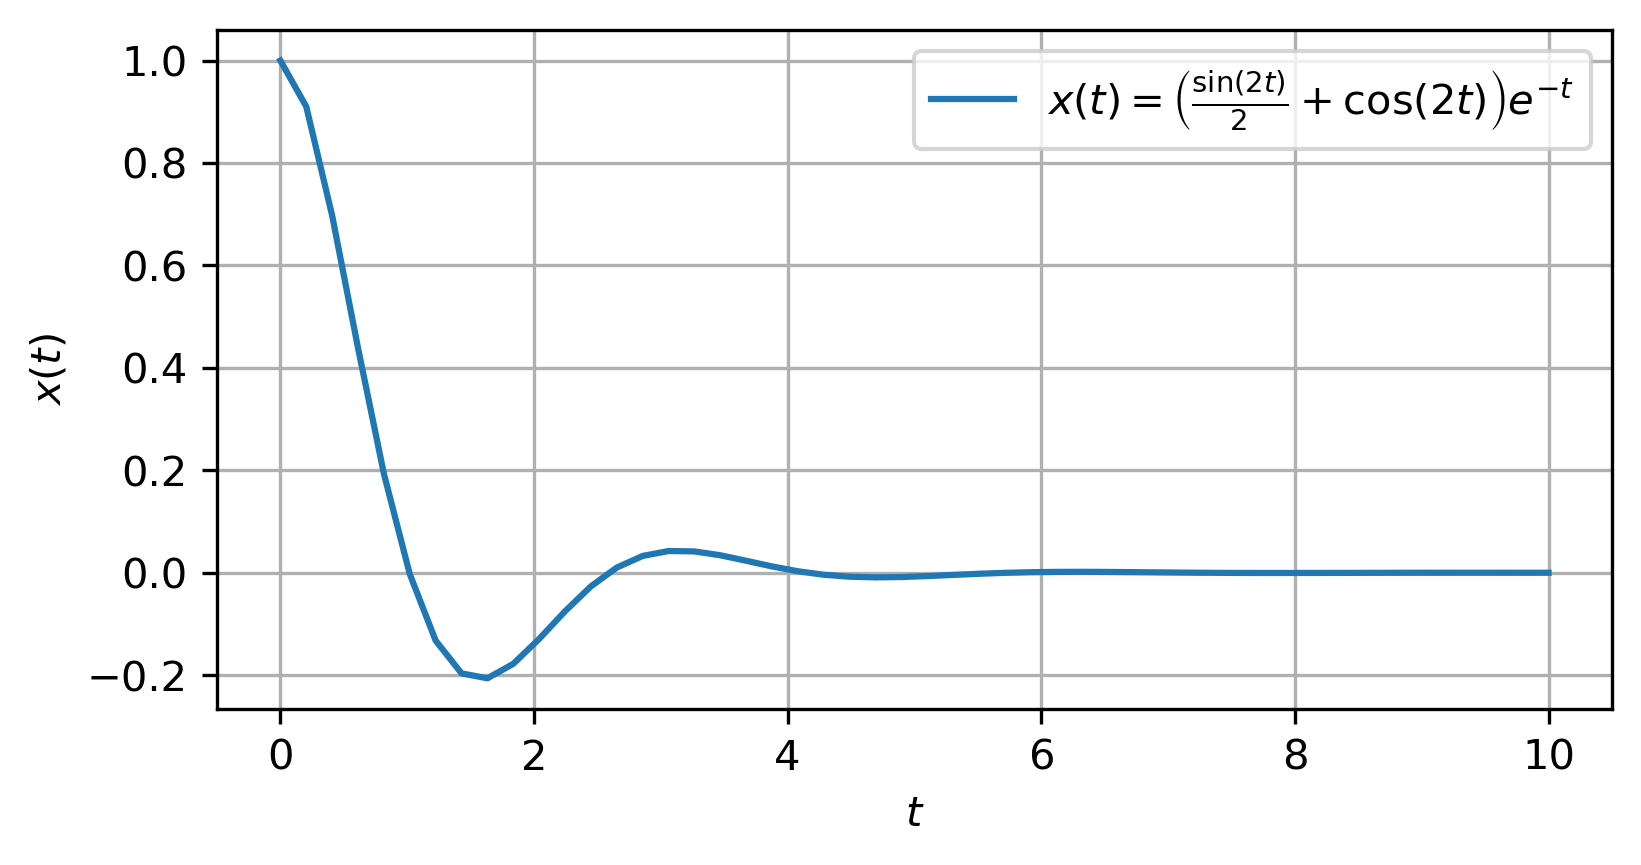

In [8]:
md("""
## Gráfico da função

Finalmente, pode-se plotar o gráfico da função:
""")

t=np.linspace(0,10)

plt.figure(figsize=(6,3),dpi=300)
plt.plot(t,f(t),label=f'${sym.latex(sol)}$');
plt.grid(True);
plt.xlabel('$t$');
plt.ylabel('$x(t)$');
plt.legend();

In [9]:
md("""
# Caso geral

O caso geral de uma EDO é apresentado abaixo:
""")

# Criando uma função simbólica
f = sym.Function('x')

#Criando uma variável simbólica
t = sym.Symbol('t')

# Criando a constante de amortecimento e a frequência natural
g, w = sym.symbols('g w_0')

# A EDO é mostrada após apertar uma tecla
d2=f(t).diff(t,2)
d1=g*f(t).diff(t)
d0=w**2*f(t)
edo = d2+d1+d0
Eqn(f'{tex(d2)}+{tex(d1)}+{tex(d0)}=0')

md(f"""
Onde:
- ${g}$ é o coeficiente de amortecimento  
- ${w}$ é a frequência natural
""")


# Caso geral

O caso geral de uma EDO é apresentado abaixo:


\begin{equation}\frac{d^{2}}{d t^{2}} x{\left(t \right)}+g \frac{d}{d t} x{\left(t \right)}+w_{0}^{2} x{\left(t \right)}=0\end{equation}


Onde:
- $g$ é o coeficiente de amortecimento  
- $w_0$ é a frequência natural


In [10]:
md("""
## Solução geral

A solução geral desta Equação é apresentada abaixo:
""")

sol=sym.dsolve(edo,f(t))
Eqn(tex(sol))


## Solução geral

A solução geral desta Equação é apresentada abaixo:


\begin{equation}x{\left(t \right)} = C_{1} e^{\frac{t \left(- g - \sqrt{g^{2} - 4 w_{0}^{2}}\right)}{2}} + C_{2} e^{\frac{t \left(- g + \sqrt{g^{2} - 4 w_{0}^{2}}\right)}{2}}\end{equation}

In [11]:

x0, v0 = sym.symbols('x_0 v_0')

md(f"""
## Solução particular

Considerando as condições iniciais:
- $x(0)={x0}$   
- $x'(0)={v0}$   

A solução geral é:
""")

# Podemos usar o parâmetro ics para adicionar as condições iniciais diretamente
solcond=sym.dsolve(edo,f(t),ics={f(0): x0, f(t).diff(t).subs(t, 0): v0})
Eqn(tex(solcond))


## Solução particular

Considerando as condições iniciais:
- $x(0)=x_0$   
- $x'(0)=v_0$   

A solução geral é:


\begin{equation}x{\left(t \right)} = \left(- \frac{g x_{0}}{2 \sqrt{g^{2} - 4 w_{0}^{2}}} - \frac{v_{0}}{\sqrt{g^{2} - 4 w_{0}^{2}}} + \frac{x_{0}}{2}\right) e^{\frac{t \left(- g - \sqrt{g^{2} - 4 w_{0}^{2}}\right)}{2}} + \left(\frac{g x_{0}}{2 \sqrt{g^{2} - 4 w_{0}^{2}}} + \frac{v_{0}}{\sqrt{g^{2} - 4 w_{0}^{2}}} + \frac{x_{0}}{2}\right) e^{\frac{t \left(- g + \sqrt{g^{2} - 4 w_{0}^{2}}\right)}{2}}\end{equation}

# Obrigado!